In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

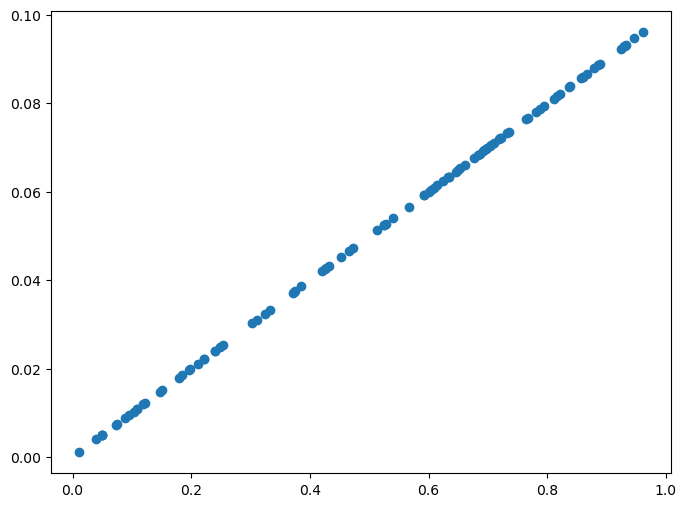

In [9]:
x = np.random.rand(100)
y = 0.2 * x * 0.5

plt.figure(figsize=(8,6))
plt.scatter(x,y)
plt.show()

In [10]:
def plt_prediction(y,pred):
    plt.figure(figsize=(8,6))
    plt.scatter(x,y, color = 'blue', label = 'Actual')
    plt.scatter(x,pred, color = 'orange', label = 'Prediction')
    plt.legend()
    plt.show()
    

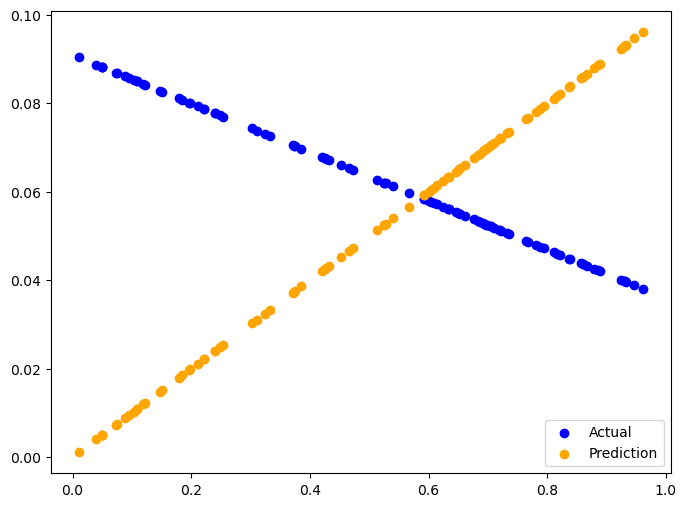

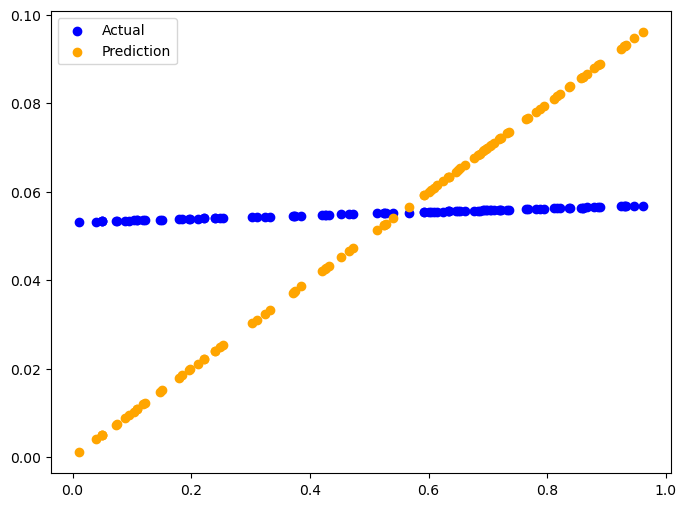

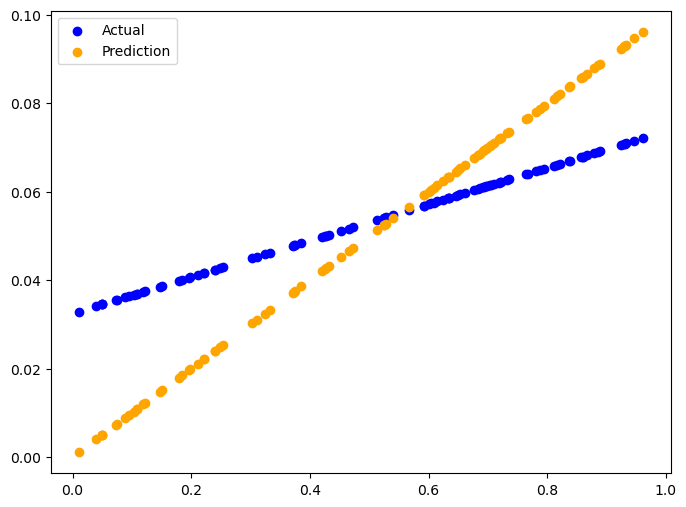

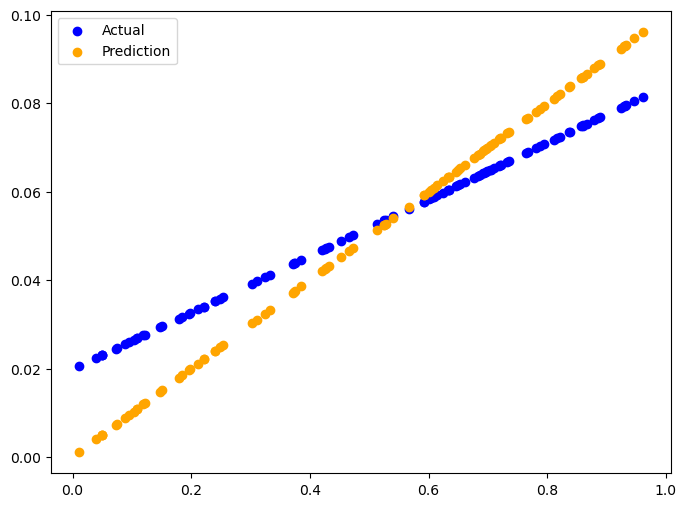

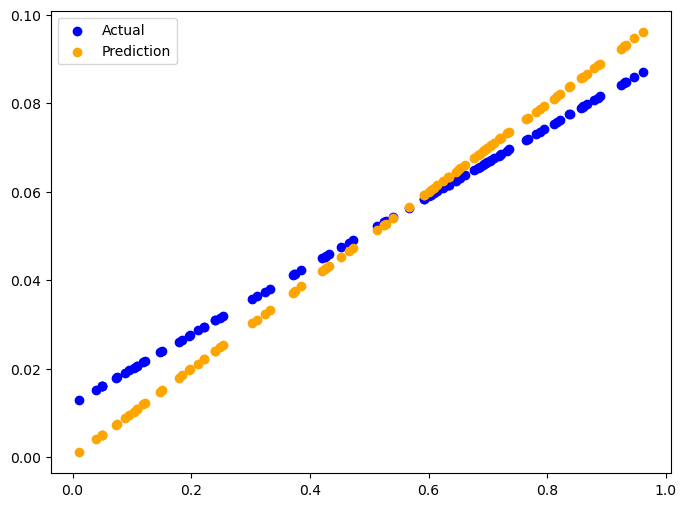

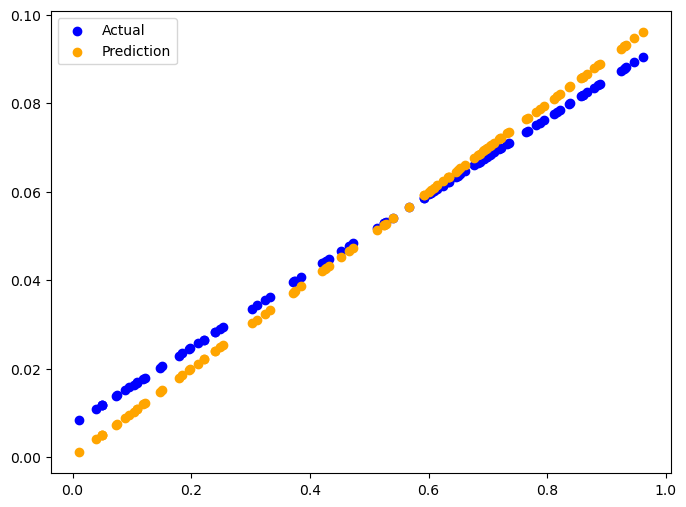

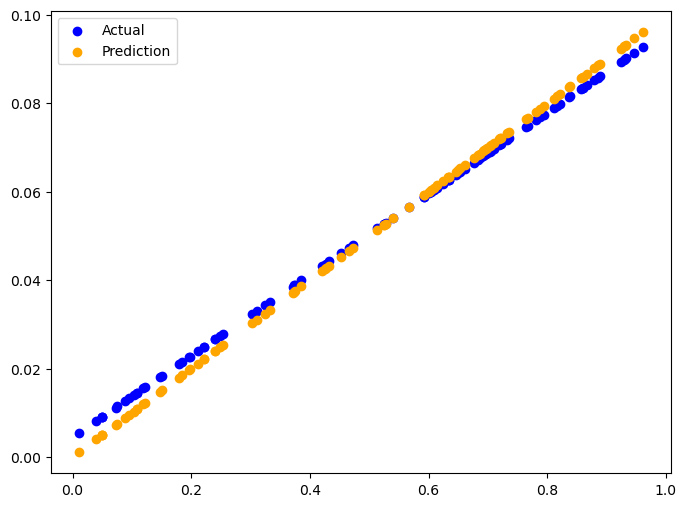

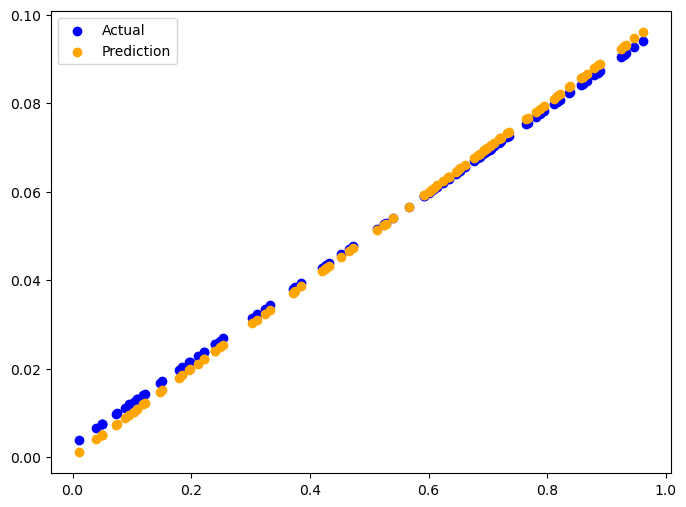

In [27]:
# 단순경사하강법 y = WX+b

# 가중치 초기값
W = np.random.uniform(-1,1)
b = np.random.uniform(-1,1)
learning_rate = 0.8

for epoch in range(100):
    y_pred = W * x + b #예측함수
    error = np.abs(y_pred - y).mean() #절대값의 손실함수 
    if error < 0.001 :  # 오차가 0에 가까우면 반복 종료
        break 
    # 새로운 w 찾기 -> 오차 -> 기울기 계산 -> 학습률 적용 -> W_update 
    W_descent = learning_rate * ((y_pred - y) * x).mean()
    b_descent = learning_rate * (y_pred - y).mean()
    
    W = W - W_descent
    b = b - b_descent
    
    if epoch % 10 == 0 :
        n_y_pred = W * x + b
        plt_prediction(n_y_pred, y)
    

## 사이킷런 LinearRegrssion을 이용한 보스턴 주택 가격 예측

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [20]:
boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

In [21]:
bostonDF['PRICE'] = boston.target

In [22]:
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [23]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


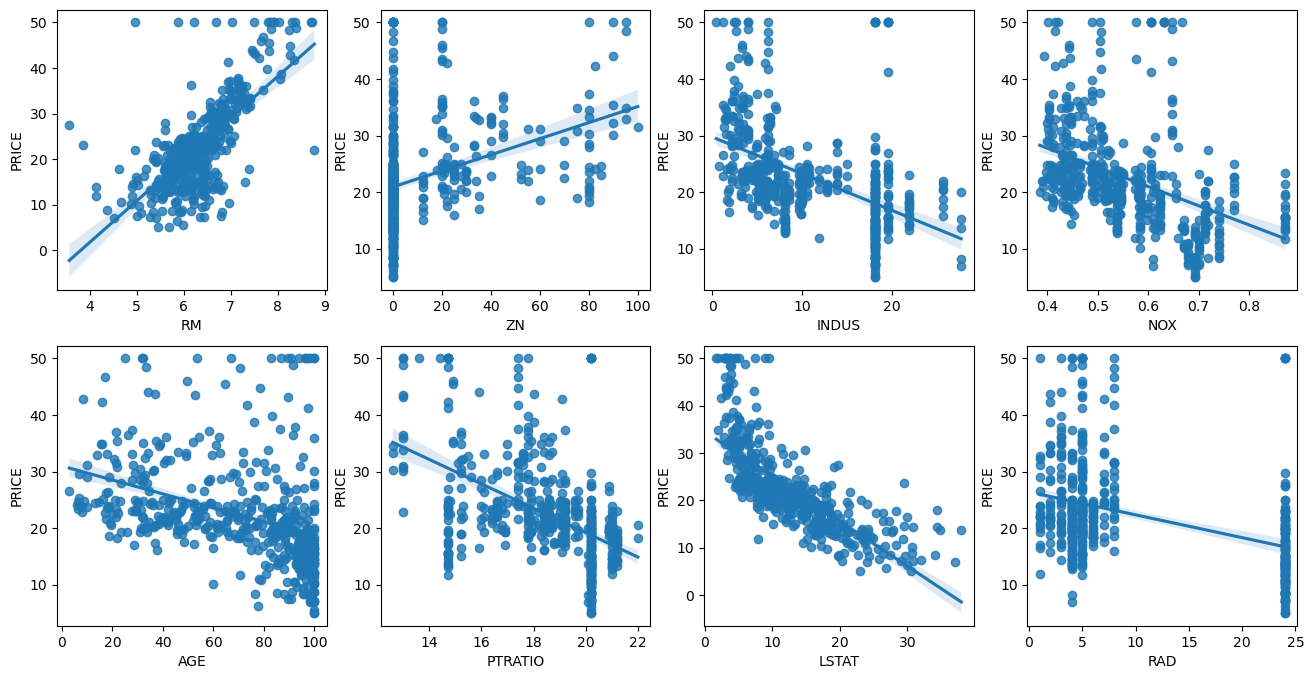

In [24]:
fig,axs = plt.subplots(figsize=(16,8), ncols= 4, nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax = axs[row][col])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace= False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size= 0.3, random_state= 11)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 25.014, RMSE : 5.001
Variance score : 0.726


In [31]:
print('절편값 :', lr.intercept_ )
print('회귀 계수값 :', np.round(lr.coef_,1))

절편값 : 32.600384209585826
회귀 계수값 : [ -0.1   0.    0.    2.7 -19.    4.1   0.   -1.3   0.4  -0.   -0.9   0.
  -0.5]


In [33]:
coeff = pd.Series(data = np.round(lr.coef_,1), index = X_data.columns)
coeff.sort_values(ascending = False)

RM          4.1
CHAS        2.7
RAD         0.4
ZN          0.0
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.5
PTRATIO    -0.9
DIS        -1.3
NOX       -19.0
dtype: float64

In [40]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1, inplace= False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = 'neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:',np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE: {0:.3f} '.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE: 5.829 
